In [1474]:
%load_ext autoreload
%autoreload 2
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.functional import pad
from torchviz import make_dot
import matplotlib.pyplot as plt
import numpy as np


os.chdir("../")
import src.warp as warp
from src.warp_network import PerturbationNetwork, ShiftNetwork
import src.linear_basis as lb
from src.cont_support import generate_example_waves as gw
from src.cont_support import generate_sample_perturbations


from xitorch.interpolate import Interp1D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


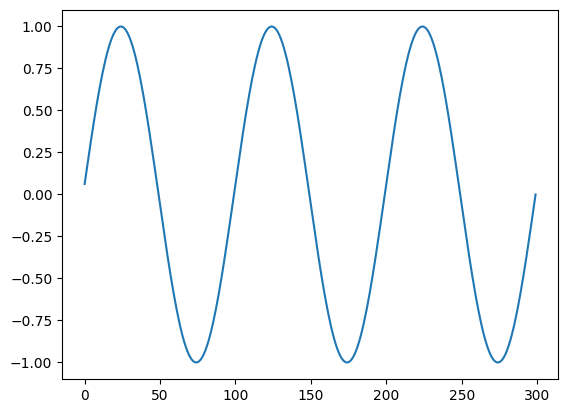

In [1475]:
# Create sample waves
n=300
sr=10
z, x, y1 = gw(n)
plt.plot(x)

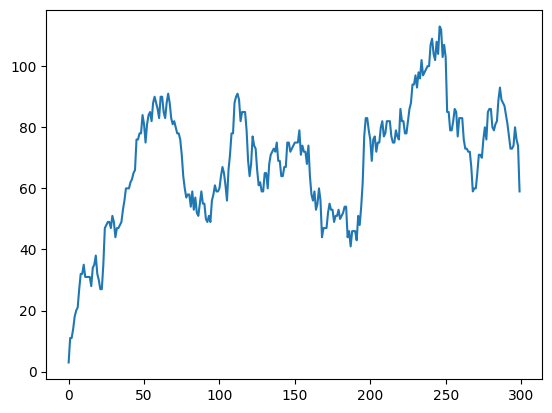

In [1476]:
# Create perturbation profile
p_step, p = generate_sample_perturbations(6, n, truncate=False, sr=sr)
plt.plot(p)

In [1477]:
# Example usage
x = torch.tensor(x, dtype=torch.float32)
#print(x)
X = warp.matrix_decomp(x, n, sr)

X_s = warp.X_shift(X, sr, torch.tensor(p))

x_s = torch.nanmedian(X_s, dim=0).values
x_out = warp.fill_nan_with_last_value(x_s)

# Downsample with the indexing notation
y = x_out[::sr]
y = y[:len(x)]
print(y.shape)



torch.Size([300])


In [1478]:
# Add some functional form and noise
#y = 0.2*y**2 - 1*y + 0.3

torch.Size([300])
torch.Size([300])


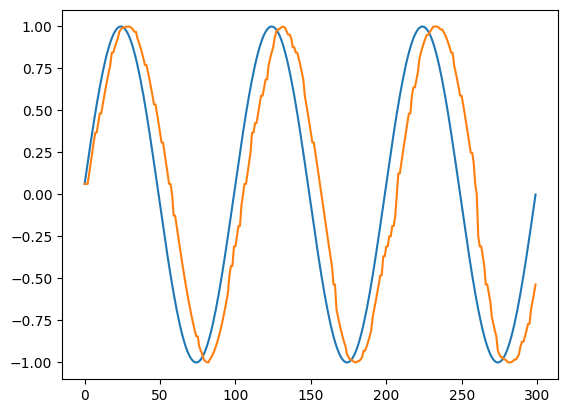

In [1479]:

print(x.shape)
print(y.shape)


plt.plot(x)
plt.plot(y)

In [1480]:
# Add another dimension to the input
x = x.unsqueeze(1)

In [1481]:


x = x.to(torch.float32)
y = y.to(torch.float32)

p_mod = PerturbationNetwork(1, 5, t=n)
model = ShiftNetwork(n=1, hidden_size=5, t=n)
#optimizer = optim.Adam(model.parameters(), lr=0.01)
#optimizer2 = optim.Adam(p_mod.parameters(), lr=0.01)

optimizer = optim.Adam(list(model.parameters()) + list(p_mod.parameters()), lr=0.01)


#x_i = torch.full((n*sr,), float('nan'), dtype=torch.float32)
X = warp.matrix_decomp(x, x.shape[0], sr)

# Use standarised time range as input p
p = torch.tensor(np.arange(0,len(p))/len(p),dtype=torch.float32).unsqueeze(0).T

# Double the size along the second axis
X= torch.cat((X, torch.full((3000, 6000), float('nan'))), dim=1)









    

In [1482]:
print(X)

tensor([[0.0628,    nan,    nan,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan]])


0
tensor(-585.6195, grad_fn=<SumBackward0>)
tensor(-574.0781, grad_fn=<SumBackward0>)
sigma None
sigma_t None
fc1.weight None
fc1.bias None
fc2.weight None
fc2.bias None
fc3.weight None
fc3.bias None
fc4.weight None
fc4.bias None
warp.weight None
p_out.weight None


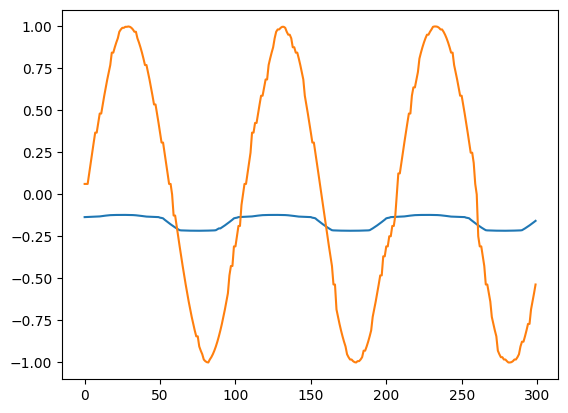

1
tensor(-582.2576, grad_fn=<SumBackward0>)
tensor(-570.9781, grad_fn=<SumBackward0>)
2
tensor(-578.9080, grad_fn=<SumBackward0>)
tensor(-567.9007, grad_fn=<SumBackward0>)
3
tensor(-575.5918, grad_fn=<SumBackward0>)
tensor(-564.8475, grad_fn=<SumBackward0>)
4
tensor(-572.3011, grad_fn=<SumBackward0>)
tensor(-561.8186, grad_fn=<SumBackward0>)
5
tensor(-569.0373, grad_fn=<SumBackward0>)
tensor(-558.8127, grad_fn=<SumBackward0>)
6
tensor(-565.8180, grad_fn=<SumBackward0>)
tensor(-555.8254, grad_fn=<SumBackward0>)
7
tensor(-562.5556, grad_fn=<SumBackward0>)
tensor(-552.8505, grad_fn=<SumBackward0>)
8
tensor(-559.3386, grad_fn=<SumBackward0>)
tensor(-549.8790, grad_fn=<SumBackward0>)
9
tensor(-556.1079, grad_fn=<SumBackward0>)
tensor(-546.9037, grad_fn=<SumBackward0>)
10
tensor(-552.8608, grad_fn=<SumBackward0>)
tensor(-543.9203, grad_fn=<SumBackward0>)
11
tensor(-549.5942, grad_fn=<SumBackward0>)
tensor(-540.9282, grad_fn=<SumBackward0>)
12
tensor(-546.3425, grad_fn=<SumBackward0>)
tensor(

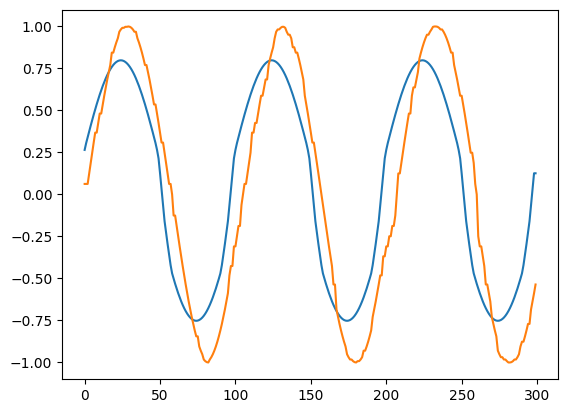

51
tensor(-428.0811, grad_fn=<SumBackward0>)
tensor(-421.2530, grad_fn=<SumBackward0>)
52
tensor(-425.1456, grad_fn=<SumBackward0>)
tensor(-418.2620, grad_fn=<SumBackward0>)
53
tensor(-422.2461, grad_fn=<SumBackward0>)
tensor(-415.2716, grad_fn=<SumBackward0>)
54
tensor(-419.3841, grad_fn=<SumBackward0>)
tensor(-412.2816, grad_fn=<SumBackward0>)
55
tensor(-416.3711, grad_fn=<SumBackward0>)
tensor(-409.2916, grad_fn=<SumBackward0>)
56
tensor(-413.3978, grad_fn=<SumBackward0>)
tensor(-406.3013, grad_fn=<SumBackward0>)
57
tensor(-410.7905, grad_fn=<SumBackward0>)
tensor(-403.3107, grad_fn=<SumBackward0>)
58
tensor(-407.8874, grad_fn=<SumBackward0>)
tensor(-400.3198, grad_fn=<SumBackward0>)
59
tensor(-404.9915, grad_fn=<SumBackward0>)
tensor(-397.3293, grad_fn=<SumBackward0>)
60
tensor(-402.1199, grad_fn=<SumBackward0>)
tensor(-394.3389, grad_fn=<SumBackward0>)
61
tensor(-399.2708, grad_fn=<SumBackward0>)
tensor(-391.3489, grad_fn=<SumBackward0>)
62
tensor(-396.4330, grad_fn=<SumBackward0>

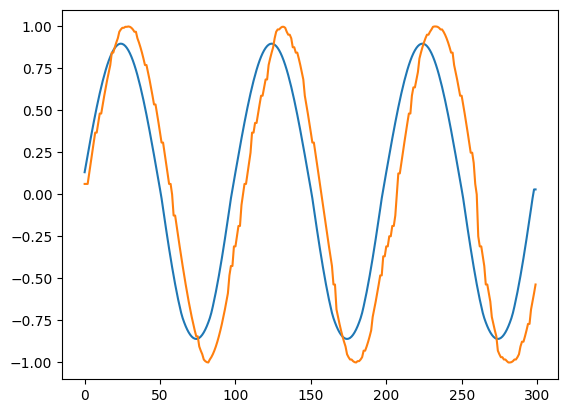

101
tensor(-289.7215, grad_fn=<SumBackward0>)
tensor(-271.7368, grad_fn=<SumBackward0>)
102
tensor(-287.1385, grad_fn=<SumBackward0>)
tensor(-268.7466, grad_fn=<SumBackward0>)
103
tensor(-284.5646, grad_fn=<SumBackward0>)
tensor(-265.7564, grad_fn=<SumBackward0>)
104
tensor(-282.0007, grad_fn=<SumBackward0>)
tensor(-262.7661, grad_fn=<SumBackward0>)
105
tensor(-279.4463, grad_fn=<SumBackward0>)
tensor(-259.7759, grad_fn=<SumBackward0>)
106
tensor(-276.9014, grad_fn=<SumBackward0>)
tensor(-256.7857, grad_fn=<SumBackward0>)
107
tensor(-274.3673, grad_fn=<SumBackward0>)
tensor(-253.7955, grad_fn=<SumBackward0>)
108
tensor(-271.8441, grad_fn=<SumBackward0>)
tensor(-250.8053, grad_fn=<SumBackward0>)
109
tensor(-269.3322, grad_fn=<SumBackward0>)
tensor(-247.8151, grad_fn=<SumBackward0>)
110
tensor(-266.8348, grad_fn=<SumBackward0>)
tensor(-244.8249, grad_fn=<SumBackward0>)
111
tensor(-264.3588, grad_fn=<SumBackward0>)
tensor(-241.8347, grad_fn=<SumBackward0>)
112
tensor(-261.9094, grad_fn=<S

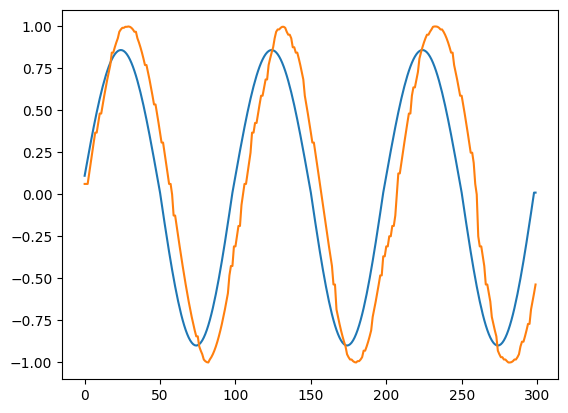

151
tensor(-175.9691, grad_fn=<SumBackward0>)
tensor(-122.2277, grad_fn=<SumBackward0>)
152
tensor(-173.8648, grad_fn=<SumBackward0>)
tensor(-119.2375, grad_fn=<SumBackward0>)
153
tensor(-172.0816, grad_fn=<SumBackward0>)
tensor(-116.2474, grad_fn=<SumBackward0>)
154
tensor(-170.3398, grad_fn=<SumBackward0>)
tensor(-113.2573, grad_fn=<SumBackward0>)
155
tensor(-168.3518, grad_fn=<SumBackward0>)
tensor(-110.2671, grad_fn=<SumBackward0>)
156
tensor(-166.5731, grad_fn=<SumBackward0>)
tensor(-107.2770, grad_fn=<SumBackward0>)
157
tensor(-164.8798, grad_fn=<SumBackward0>)
tensor(-104.2868, grad_fn=<SumBackward0>)
158
tensor(-162.9911, grad_fn=<SumBackward0>)
tensor(-101.2967, grad_fn=<SumBackward0>)
159
tensor(-161.2719, grad_fn=<SumBackward0>)
tensor(-98.3065, grad_fn=<SumBackward0>)
160
tensor(-159.6125, grad_fn=<SumBackward0>)
tensor(-95.3164, grad_fn=<SumBackward0>)
161
tensor(-157.8125, grad_fn=<SumBackward0>)
tensor(-92.3263, grad_fn=<SumBackward0>)
162
tensor(-156.1543, grad_fn=<SumB

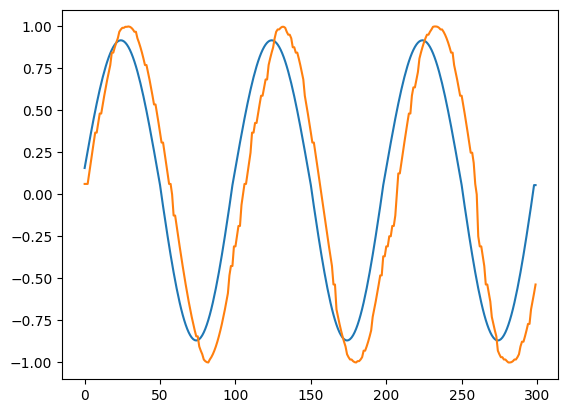

201
tensor(-107.4183, grad_fn=<SumBackward0>)
tensor(27.2705, grad_fn=<SumBackward0>)
202
tensor(-106.5795, grad_fn=<SumBackward0>)
tensor(30.2585, grad_fn=<SumBackward0>)
203
tensor(-105.9275, grad_fn=<SumBackward0>)
tensor(33.2542, grad_fn=<SumBackward0>)
204
tensor(-105.1358, grad_fn=<SumBackward0>)
tensor(36.2374, grad_fn=<SumBackward0>)
205
tensor(-104.2664, grad_fn=<SumBackward0>)
tensor(39.2345, grad_fn=<SumBackward0>)
206
tensor(-103.5941, grad_fn=<SumBackward0>)
tensor(42.2201, grad_fn=<SumBackward0>)
207
tensor(-102.9727, grad_fn=<SumBackward0>)
tensor(45.2116, grad_fn=<SumBackward0>)
208
tensor(-102.2131, grad_fn=<SumBackward0>)
tensor(48.2041, grad_fn=<SumBackward0>)
209
tensor(-101.4980, grad_fn=<SumBackward0>)
tensor(51.1898, grad_fn=<SumBackward0>)
210
tensor(-100.9238, grad_fn=<SumBackward0>)
tensor(54.1844, grad_fn=<SumBackward0>)
211
tensor(-100.3273, grad_fn=<SumBackward0>)
tensor(57.1727, grad_fn=<SumBackward0>)
212
tensor(-99.6604, grad_fn=<SumBackward0>)
tensor(60

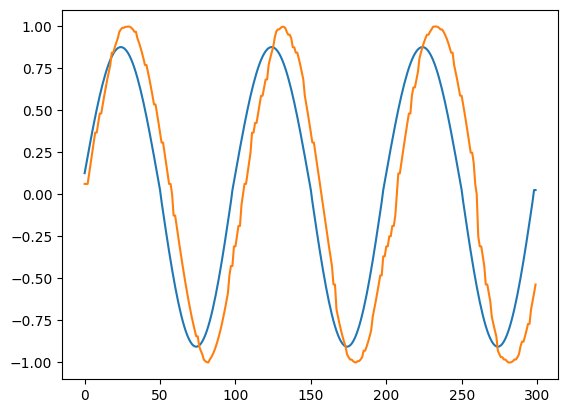

251
tensor(-87.4655, grad_fn=<SumBackward0>)
tensor(176.7720, grad_fn=<SumBackward0>)
252
tensor(-87.4587, grad_fn=<SumBackward0>)
tensor(179.7386, grad_fn=<SumBackward0>)
253
tensor(-87.5172, grad_fn=<SumBackward0>)
tensor(182.7326, grad_fn=<SumBackward0>)
254
tensor(-87.1518, grad_fn=<SumBackward0>)
tensor(185.7408, grad_fn=<SumBackward0>)
255
tensor(-87.0966, grad_fn=<SumBackward0>)
tensor(188.7093, grad_fn=<SumBackward0>)
256
tensor(-87.1411, grad_fn=<SumBackward0>)
tensor(191.7085, grad_fn=<SumBackward0>)
257
tensor(-86.8849, grad_fn=<SumBackward0>)
tensor(194.7096, grad_fn=<SumBackward0>)
258
tensor(-86.8147, grad_fn=<SumBackward0>)
tensor(197.6827, grad_fn=<SumBackward0>)
259
tensor(-86.8394, grad_fn=<SumBackward0>)
tensor(200.6792, grad_fn=<SumBackward0>)
260
tensor(-86.6540, grad_fn=<SumBackward0>)
tensor(203.6800, grad_fn=<SumBackward0>)
261
tensor(-86.5921, grad_fn=<SumBackward0>)
tensor(206.6579, grad_fn=<SumBackward0>)
262
tensor(-86.5993, grad_fn=<SumBackward0>)
tensor(20

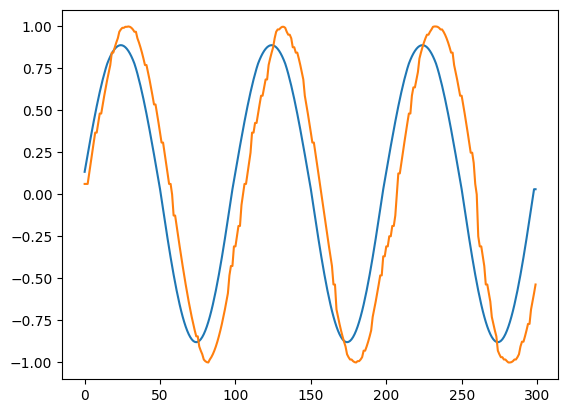

301
tensor(-85.7150, grad_fn=<SumBackward0>)
tensor(326.1658, grad_fn=<SumBackward0>)
302
tensor(-85.7118, grad_fn=<SumBackward0>)
tensor(329.1702, grad_fn=<SumBackward0>)
303
tensor(-85.7089, grad_fn=<SumBackward0>)
tensor(332.2032, grad_fn=<SumBackward0>)
304
tensor(-85.7072, grad_fn=<SumBackward0>)
tensor(335.2261, grad_fn=<SumBackward0>)
305
tensor(-85.7051, grad_fn=<SumBackward0>)
tensor(338.2131, grad_fn=<SumBackward0>)
306
tensor(-85.7029, grad_fn=<SumBackward0>)
tensor(341.1726, grad_fn=<SumBackward0>)
307
tensor(-85.7013, grad_fn=<SumBackward0>)
tensor(344.1240, grad_fn=<SumBackward0>)
308
tensor(-85.6999, grad_fn=<SumBackward0>)
tensor(347.0893, grad_fn=<SumBackward0>)
309
tensor(-85.6985, grad_fn=<SumBackward0>)
tensor(350.0902, grad_fn=<SumBackward0>)
310
tensor(-85.6970, grad_fn=<SumBackward0>)
tensor(353.1229, grad_fn=<SumBackward0>)
311
tensor(-85.6960, grad_fn=<SumBackward0>)
tensor(356.1494, grad_fn=<SumBackward0>)
312
tensor(-85.6951, grad_fn=<SumBackward0>)
tensor(35

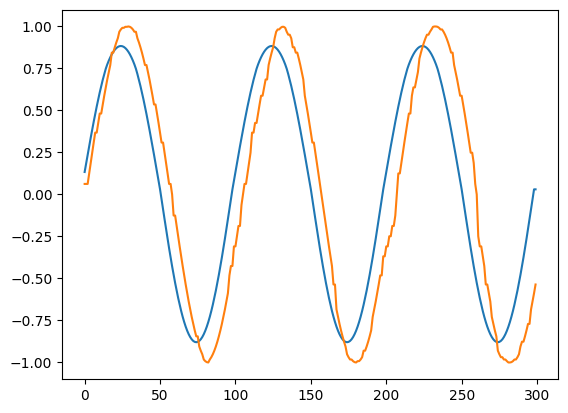

351
tensor(-85.6884, grad_fn=<SumBackward0>)
tensor(475.6299, grad_fn=<SumBackward0>)
352
tensor(-85.7003, grad_fn=<SumBackward0>)
tensor(478.5218, grad_fn=<SumBackward0>)
353
tensor(-85.7048, grad_fn=<SumBackward0>)
tensor(481.4279, grad_fn=<SumBackward0>)
354
tensor(-85.6954, grad_fn=<SumBackward0>)
tensor(484.4062, grad_fn=<SumBackward0>)
355
tensor(-85.6876, grad_fn=<SumBackward0>)
tensor(487.4865, grad_fn=<SumBackward0>)
356
tensor(-85.6890, grad_fn=<SumBackward0>)
tensor(490.5993, grad_fn=<SumBackward0>)
357
tensor(-85.6962, grad_fn=<SumBackward0>)
tensor(493.6401, grad_fn=<SumBackward0>)
358
tensor(-85.6970, grad_fn=<SumBackward0>)
tensor(496.5849, grad_fn=<SumBackward0>)
359
tensor(-85.6903, grad_fn=<SumBackward0>)
tensor(499.4724, grad_fn=<SumBackward0>)
360
tensor(-85.6867, grad_fn=<SumBackward0>)
tensor(502.3470, grad_fn=<SumBackward0>)
361
tensor(-85.6886, grad_fn=<SumBackward0>)
tensor(505.2654, grad_fn=<SumBackward0>)
362
tensor(-85.6925, grad_fn=<SumBackward0>)
tensor(50

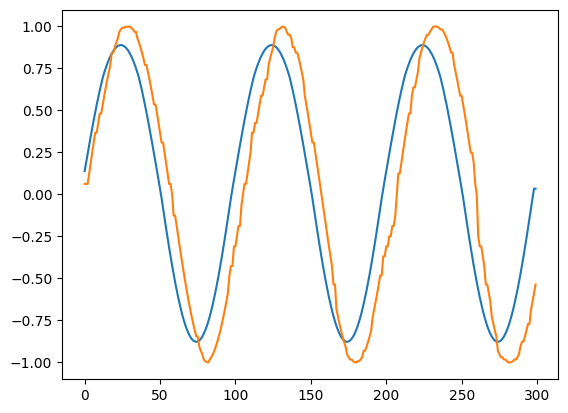

401
tensor(-85.6926, grad_fn=<SumBackward0>)
tensor(624.7384, grad_fn=<SumBackward0>)
402
tensor(-85.6873, grad_fn=<SumBackward0>)
tensor(627.9933, grad_fn=<SumBackward0>)
403
tensor(-85.7010, grad_fn=<SumBackward0>)
tensor(630.9933, grad_fn=<SumBackward0>)
404
tensor(-85.6973, grad_fn=<SumBackward0>)
tensor(633.7763, grad_fn=<SumBackward0>)
405
tensor(-85.6828, grad_fn=<SumBackward0>)
tensor(636.4608, grad_fn=<SumBackward0>)
406
tensor(-83.2822, grad_fn=<SumBackward0>)
tensor(639.1716, grad_fn=<SumBackward0>)
407
tensor(-85.6848, grad_fn=<SumBackward0>)
tensor(642.0850, grad_fn=<SumBackward0>)
408
tensor(-85.6986, grad_fn=<SumBackward0>)
tensor(645.3226, grad_fn=<SumBackward0>)
409
tensor(-85.6939, grad_fn=<SumBackward0>)
tensor(648.7090, grad_fn=<SumBackward0>)
410
tensor(-85.6833, grad_fn=<SumBackward0>)
tensor(651.9033, grad_fn=<SumBackward0>)
411
tensor(-85.6859, grad_fn=<SumBackward0>)
tensor(654.7889, grad_fn=<SumBackward0>)
412
tensor(-85.6928, grad_fn=<SumBackward0>)
tensor(65

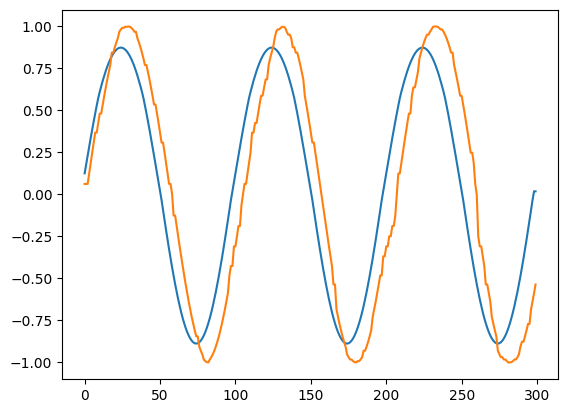

451
tensor(-85.7196, grad_fn=<SumBackward0>)
tensor(772.4217, grad_fn=<SumBackward0>)
452
tensor(-81.9394, grad_fn=<SumBackward0>)
tensor(774.7802, grad_fn=<SumBackward0>)
453
tensor(-85.6771, grad_fn=<SumBackward0>)
tensor(777.8141, grad_fn=<SumBackward0>)
454
tensor(-85.6802, grad_fn=<SumBackward0>)
tensor(781.6604, grad_fn=<SumBackward0>)
455
tensor(-85.6644, grad_fn=<SumBackward0>)
tensor(785.6310, grad_fn=<SumBackward0>)
456
tensor(-85.6603, grad_fn=<SumBackward0>)
tensor(788.9218, grad_fn=<SumBackward0>)
457
tensor(-85.6683, grad_fn=<SumBackward0>)
tensor(791.4472, grad_fn=<SumBackward0>)
458
tensor(-85.6615, grad_fn=<SumBackward0>)
tensor(793.5496, grad_fn=<SumBackward0>)
459
tensor(-84.3746, grad_fn=<SumBackward0>)
tensor(795.5955, grad_fn=<SumBackward0>)
460
tensor(-85.6502, grad_fn=<SumBackward0>)
tensor(798.0700, grad_fn=<SumBackward0>)
461
tensor(-85.3729, grad_fn=<SumBackward0>)
tensor(801.4905, grad_fn=<SumBackward0>)
462
tensor(-85.6416, grad_fn=<SumBackward0>)
tensor(80

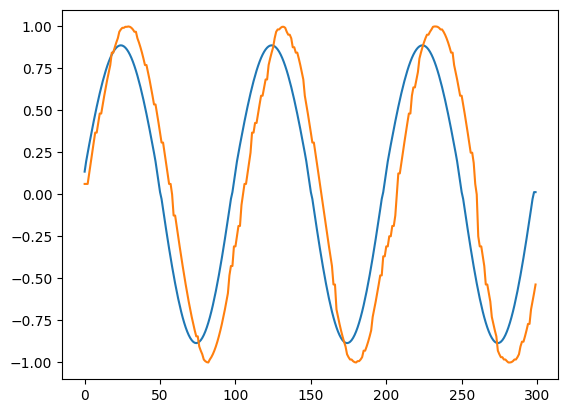

501
tensor(-85.5474, grad_fn=<SumBackward0>)
tensor(921.4585, grad_fn=<SumBackward0>)
502
tensor(-85.5722, grad_fn=<SumBackward0>)
tensor(925.0272, grad_fn=<SumBackward0>)
503
tensor(-85.5738, grad_fn=<SumBackward0>)
tensor(926.6796, grad_fn=<SumBackward0>)
504
tensor(-85.5472, grad_fn=<SumBackward0>)
tensor(927.3250, grad_fn=<SumBackward0>)
505
tensor(-82.2200, grad_fn=<SumBackward0>)
tensor(927.9088, grad_fn=<SumBackward0>)
506
tensor(-85.5506, grad_fn=<SumBackward0>)
tensor(929.7086, grad_fn=<SumBackward0>)
507
tensor(-84.3446, grad_fn=<SumBackward0>)
tensor(933.9901, grad_fn=<SumBackward0>)
508
tensor(-85.5943, grad_fn=<SumBackward0>)
tensor(940.1006, grad_fn=<SumBackward0>)
509
tensor(-85.5556, grad_fn=<SumBackward0>)
tensor(945.3856, grad_fn=<SumBackward0>)
510
tensor(-85.5442, grad_fn=<SumBackward0>)
tensor(948.2369, grad_fn=<SumBackward0>)
511
tensor(-85.5732, grad_fn=<SumBackward0>)
tensor(949.1614, grad_fn=<SumBackward0>)
512
tensor(-85.5700, grad_fn=<SumBackward0>)
tensor(94

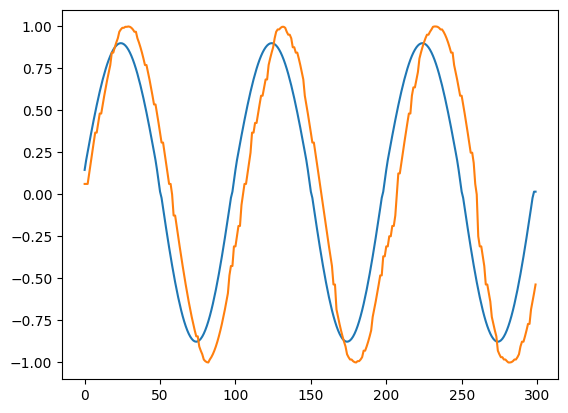

551
tensor(-84.0016, grad_fn=<SumBackward0>)
tensor(1053.9087, grad_fn=<SumBackward0>)
552
tensor(-85.5151, grad_fn=<SumBackward0>)
tensor(1052.8031, grad_fn=<SumBackward0>)
553
tensor(-81.8461, grad_fn=<SumBackward0>)
tensor(1057.2153, grad_fn=<SumBackward0>)
554
tensor(-85.5704, grad_fn=<SumBackward0>)
tensor(1067.2412, grad_fn=<SumBackward0>)
555
tensor(-85.6492, grad_fn=<SumBackward0>)
tensor(1077.1887, grad_fn=<SumBackward0>)
556
tensor(-85.5720, grad_fn=<SumBackward0>)
tensor(1081.6958, grad_fn=<SumBackward0>)
557
tensor(-85.5174, grad_fn=<SumBackward0>)
tensor(1080.7629, grad_fn=<SumBackward0>)
558
tensor(-85.5794, grad_fn=<SumBackward0>)
tensor(1076.9999, grad_fn=<SumBackward0>)
559
tensor(-85.5922, grad_fn=<SumBackward0>)
tensor(1073.0712, grad_fn=<SumBackward0>)
560
tensor(-81.0352, grad_fn=<SumBackward0>)
tensor(1072.5208, grad_fn=<SumBackward0>)
561
tensor(-85.5244, grad_fn=<SumBackward0>)
tensor(1078.9377, grad_fn=<SumBackward0>)
562
tensor(-85.5166, grad_fn=<SumBackward0>

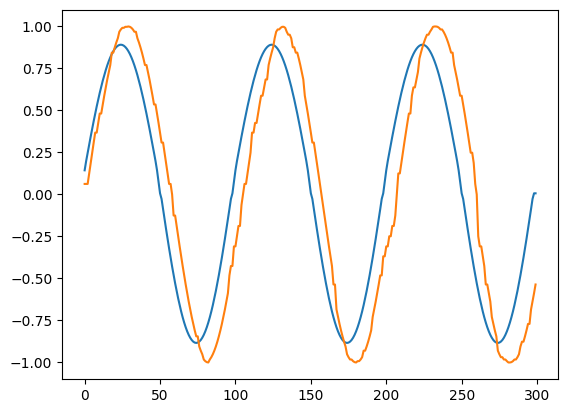

601
tensor(-85.4874, grad_fn=<SumBackward0>)
tensor(1184.9640, grad_fn=<SumBackward0>)
602
tensor(-85.4841, grad_fn=<SumBackward0>)
tensor(1204.1328, grad_fn=<SumBackward0>)
603
tensor(-85.4877, grad_fn=<SumBackward0>)
tensor(1211.5010, grad_fn=<SumBackward0>)
604
tensor(-85.4849, grad_fn=<SumBackward0>)
tensor(1206.4813, grad_fn=<SumBackward0>)
605
tensor(-85.4809, grad_fn=<SumBackward0>)
tensor(1194.7194, grad_fn=<SumBackward0>)
606
tensor(-84.2846, grad_fn=<SumBackward0>)
tensor(1181.9242, grad_fn=<SumBackward0>)
607
tensor(-85.4936, grad_fn=<SumBackward0>)
tensor(1175.1611, grad_fn=<SumBackward0>)
608
tensor(-82.1449, grad_fn=<SumBackward0>)
tensor(1182.5787, grad_fn=<SumBackward0>)
609
tensor(-85.5466, grad_fn=<SumBackward0>)
tensor(1203.8325, grad_fn=<SumBackward0>)
610
tensor(-85.5176, grad_fn=<SumBackward0>)
tensor(1224.8688, grad_fn=<SumBackward0>)
611
tensor(-85.4775, grad_fn=<SumBackward0>)
tensor(1232.4426, grad_fn=<SumBackward0>)
612
tensor(-85.5143, grad_fn=<SumBackward0>

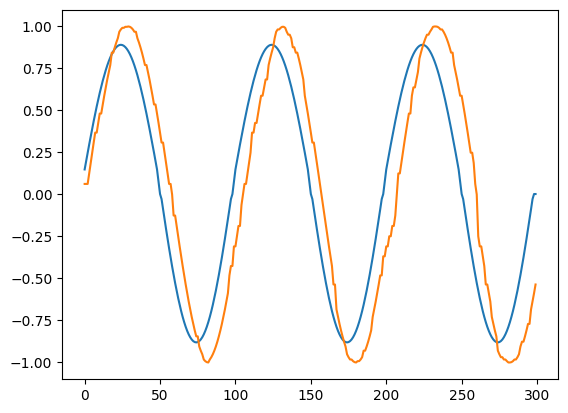

651
tensor(-85.4587, grad_fn=<SumBackward0>)
tensor(1324.5369, grad_fn=<SumBackward0>)
652
tensor(-85.4731, grad_fn=<SumBackward0>)
tensor(1331.9915, grad_fn=<SumBackward0>)
653
tensor(-85.4513, grad_fn=<SumBackward0>)
tensor(1317.9670, grad_fn=<SumBackward0>)
654
tensor(-85.4448, grad_fn=<SumBackward0>)
tensor(1292.9424, grad_fn=<SumBackward0>)
655
tensor(-85.4607, grad_fn=<SumBackward0>)
tensor(1266.6079, grad_fn=<SumBackward0>)
656
tensor(-82.2481, grad_fn=<SumBackward0>)
tensor(1250.3411, grad_fn=<SumBackward0>)
657
tensor(-85.4946, grad_fn=<SumBackward0>)
tensor(1257.7622, grad_fn=<SumBackward0>)
658
tensor(-85.4674, grad_fn=<SumBackward0>)
tensor(1291.3802, grad_fn=<SumBackward0>)
659
tensor(-85.4400, grad_fn=<SumBackward0>)
tensor(1330.9066, grad_fn=<SumBackward0>)
660
tensor(-85.4708, grad_fn=<SumBackward0>)
tensor(1350.7317, grad_fn=<SumBackward0>)
661
tensor(-85.4689, grad_fn=<SumBackward0>)
tensor(1344.3707, grad_fn=<SumBackward0>)
662
tensor(-85.4374, grad_fn=<SumBackward0>

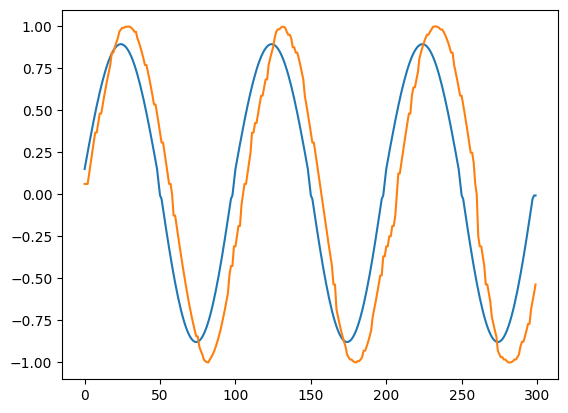

701
tensor(-85.4046, grad_fn=<SumBackward0>)
tensor(1301.9684, grad_fn=<SumBackward0>)
702
tensor(-85.4011, grad_fn=<SumBackward0>)
tensor(1345.1268, grad_fn=<SumBackward0>)
703
tensor(-85.3998, grad_fn=<SumBackward0>)
tensor(1400.2216, grad_fn=<SumBackward0>)
704
tensor(-85.4006, grad_fn=<SumBackward0>)
tensor(1434.6630, grad_fn=<SumBackward0>)
705
tensor(-85.3985, grad_fn=<SumBackward0>)
tensor(1434.7158, grad_fn=<SumBackward0>)
706
tensor(-85.3951, grad_fn=<SumBackward0>)
tensor(1408.7892, grad_fn=<SumBackward0>)
707
tensor(-85.3933, grad_fn=<SumBackward0>)
tensor(1370.8409, grad_fn=<SumBackward0>)
708
tensor(-85.3915, grad_fn=<SumBackward0>)
tensor(1332.0366, grad_fn=<SumBackward0>)
709
tensor(-85.3877, grad_fn=<SumBackward0>)
tensor(1304.3677, grad_fn=<SumBackward0>)
710
tensor(-85.3842, grad_fn=<SumBackward0>)
tensor(1303.4413, grad_fn=<SumBackward0>)
711
tensor(-85.3816, grad_fn=<SumBackward0>)
tensor(1338.4711, grad_fn=<SumBackward0>)
712
tensor(-85.3787, grad_fn=<SumBackward0>

KeyboardInterrupt: 

In [1483]:
# Train the model for 100 epochs
for epoch in range(1000):
    print(epoch)
    
    # Forward pass 1
    p_out = p_mod(p)
    y_pred = model(X, p_out)

    loss = model.log_likelihood(y_pred, y, p_out)

    if epoch % 50 == 0:
        for name, param in model.named_parameters():
            print(name, param.grad)

        for name, param in p_mod.named_parameters():
            print(name, param.grad)

        plt.plot(y_pred.detach().numpy())
        plt.plot(y)
        plt.show()

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()